# Mini proyecto2
## Parte 1: Perceptrón Multicapa

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim

# Datos

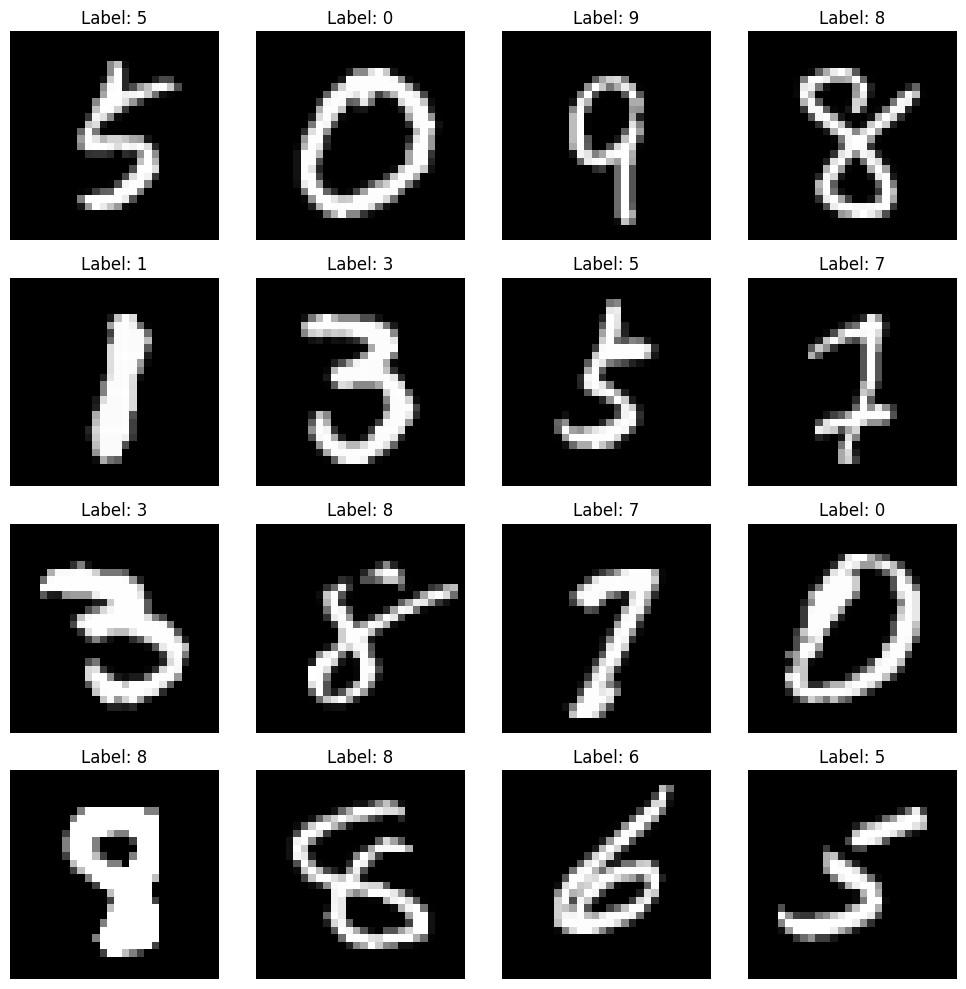

In [3]:

# Load MNIST dataset
# Definimos una secuencia de transformaciones para aplicar a las imágenes del dataset.
# En este caso, solo convertimos las imágenes a tensores utilizando `ToTensor()`.
# Esto es necesario para que las imágenes estén en un formato compatible con PyTorch.
transform = transforms.Compose([
    transforms.ToTensor()  # Convierte la imagen de un formato PIL o numpy.ndarray a un tensor.
])

# Cargamos el dataset MNIST de entrenamiento.
# `root='./data'` especifica el directorio donde se descargarán los datos si no están presentes.
# `train=True` indica que queremos el conjunto de datos de entrenamiento.
# `transform=transform` aplica las transformaciones definidas previamente a cada imagen.
# `download=True` descarga los datos si no están disponibles en el directorio especificado.
mnist_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)

# Creamos un DataLoader que nos permite cargar los datos en lotes pequeños.
# `dataset=mnist_dataset` es el dataset que se cargará.
# `batch_size=16` indica que cada lote contendrá 16 imágenes y etiquetas.
# `shuffle=True` mezcla los datos aleatoriamente en cada época, mejorando la generalización del modelo.
data_loader = DataLoader(
    mnist_dataset, batch_size=16, shuffle=True
)

# Obtenemos un único lote de datos del DataLoader.
# `next(iter(data_loader))` convierte el DataLoader en un iterador y toma el primer lote.
# El lote contiene `images` (los tensores de las imágenes) y `labels` (las etiquetas correspondientes).
images, labels = next(iter(data_loader))


# Plot the images in a grid
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f'Label: {labels[i].item()}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Arquitectura

In [4]:

# Definimos el modelo MLP
# MLP hereda de nn.Module, lo que permite utilizar las funciones y propiedades de PyTorch
# para crear, entrenar y evaluar redes neuronales.
class MLP(nn.Module):
    def __init__(self):
        # Inicializamos la clase base nn.Module
        # Esto habilita funciones esenciales como la gestión de capas y forward pass.
        super(MLP, self).__init__()
        # Capa completamente conectada: de entrada (28x28 píxeles) a 512 neuronas
        #### self.fc1 = nn.Linear(28 * 28, 512)
        self.fc1 = nn.Linear(28 * 28, 250)
        # Capa oculta: de 512 neuronas a 256 neuronas
        self.fc2 = nn.Linear(250, 50)
        # Capa de salida: de 256 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(50, 10)
        # Función de activación ReLU
        #### self.relu = nn.ReLU()
        self.relu = nn.Sigmoid()
        # Dropout para evitar sobreajuste
        self.dropout = nn.Dropout(0.2)

    # Definimos cómo pasa la información a través de la red
    # Este método es obligatorio en las clases que heredan de nn.Module.
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Aplanamos las imágenes (de 28x28 a 1D)
        x = self.relu(self.fc1(x))  # Aplicamos la primera capa y ReLU
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.relu(self.fc2(x))  # Aplicamos la segunda capa y ReLU
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.fc3(x)             # Aplicamos la capa de salida
        return x

# Entrenamiento

In [5]:
# Hiperparámetros
#### batch_size = 64       # Tamaño de lote
batch_size = 80
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 15           # Número de épocas de entrenamiento

# Preprocesamiento y carga de datos de MNIST
transform = transforms.Compose([
    transforms.ToTensor(),                 # Convertimos imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizamos a media 0 y varianza 1
])
train_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True)  # Dataset de entrenamiento
test_dataset = datasets.MNIST(
    root='./data', train=False, transform=transform, download=True)  # Dataset de prueba
train_loader = DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)  # Dataloader para entrenamiento
test_loader = DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)  # Dataloader para prueba

# Definimos el modelo, la función de pérdida y el optimizador
model = MLP()                             # Creamos una instancia del modelo MLP
criterion = nn.CrossEntropyLoss()         # Función de pérdida para clasificación
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Optimizador Adam

# Bucle de entrenamiento
for epoch in range(epochs):
    model.train()  # Ponemos el modelo en modo entrenamiento
    for images, labels in train_loader:  # Iteramos sobre lotes de datos
        optimizer.zero_grad()            # Reiniciamos los gradientes
        outputs = model(images)          # Hacemos una predicción con el modelo
        loss = criterion(outputs, labels)  # Calculamos la pérdida
        loss.backward()                  # Propagamos los gradientes
        optimizer.step()                 # Actualizamos los pesos del modelo

    # Mostramos la pérdida al final de cada época
    print(f"Época [{epoch+1}/{epochs}], Pérdida: {loss.item():.4f}")



Época [1/15], Pérdida: 0.3386
Época [2/15], Pérdida: 0.1958
Época [3/15], Pérdida: 0.1772
Época [4/15], Pérdida: 0.2927
Época [5/15], Pérdida: 0.0714
Época [6/15], Pérdida: 0.0807
Época [7/15], Pérdida: 0.0849
Época [8/15], Pérdida: 0.0484
Época [9/15], Pérdida: 0.0691
Época [10/15], Pérdida: 0.0509
Época [11/15], Pérdida: 0.0961
Época [12/15], Pérdida: 0.0356
Época [13/15], Pérdida: 0.0786
Época [14/15], Pérdida: 0.0731
Época [15/15], Pérdida: 0.0858


# Evaluación del modelo

In [9]:
model.eval()  # Ponemos el modelo en modo evaluación (desactiva Dropout)
correct = 0
total = 0
with torch.no_grad():  # Desactivamos el cálculo de gradientes para evaluación
    for images, labels in test_loader:  # Iteramos sobre los datos de prueba
        outputs = model(images)         # Hacemos predicciones
        _, predicted = torch.max(outputs.data, 1)  # Obtenemos la clase con mayor probabilidad
        total += labels.size(0)         # Total de muestras evaluadas
        correct += (predicted == labels).sum().item()  # Contamos las predicciones correctas

# Calculamos y mostramos la precisión del modelo
accuracy = 100 * correct / total
print(f"Accuracy en el conjunto de prueba: {accuracy:.2f}%")

Accuracy en el conjunto de prueba: 97.64%


#### Perceptrón Multicapa
#### Test 1:
- Entrada: 250
- Capa oculta: 250 a 50
- Capa de slaida: 50 a 10
- Algoritmo de optimización: Adam
- Tasa de aprendizaje: 0.001
- Batch: 64
- Épocas: 10
- Función de activación Sigmoid
##### El Test 1 arrojó un accuracy de 97.46% con las especificaciones realizadas.


#### Test 2:
- Entrada: 250
- Capa oculta: 250 a 50
- Capa de slaida: 50 a 10
- Algoritmo de optimización: Adam
- Tasa de aprendizaje: 0.001
- Batch: 64
- Épocas: 10
- Función de activación Relu
##### El Test 2 arrojó un accuracy de 97.16% con las especificaciones realizadas.
    Se aplican los mismos parámetros que el Test 1, con la única distinción en la función de activación.


#### Test 3:
- Entrada: 250
- Capa oculta: 250 a 50
- Capa de slaida: 50 a 10
- Algoritmo de optimización: Adam
- Tasa de aprendizaje: 0.001
- Batch: 30
- Épocas: 10
- Función de activación Relu
##### El Test 3 arrojó un accuracy de 96.43% con las especificaciones realizadas.
    Se aplican los mismos parámetros que el Test 2, pero la única modificación que se hizo esta vez fue en el tamaño del lote, donde se modifico a 30. Lo que ocasionó que el accuracy disminuyera aún más.


#### Test 4:
- Entrada: 250
- Capa oculta: 250 a 50
- Capa de slaida: 50 a 10
- Algoritmo de optimización: Adam
- Tasa de aprendizaje: 0.001
- Batch: 80
- Épocas: 15
- Función de activación Sigmoid
##### El Test 4 arrojó un accuracy de 97.80% con las especificaciones realizadas.
    Siguiendo con el mismo orden, respecto del test anterior, se modificó la cantidad de épocas a 15 y se aumentó el batch a 80. Logrando aumentar el accuracy.


# Conclusión Parte 1
En conclusión, de los test establecidos en este experimento, donde se ingresaron distintas modificaciones
con tal de evaluar cada modelo modificado y así detectar el modelo con más precisión sobre los datos.

En ese sentido, luego de modificación de parámetros dentro de la arquitectura y entrenamiento del modelo,
se logró determinar que la mjor estratega es la realizada en el Test 4.

Esta conclusión se define principalmente por obtener el mejor accuracy de todos los test realizados.
Si bien en varios test se mantuvo la misma cantidad de neuronas, se puede notar que al aumentar el
número de batch y el número de épocas, la precisión del modelo mejora. De igual forma, evaluando estos
mismos parámetros, pero modificando la función de activación, se logró definir que la función 'Sigmoid'
se adaptó más al entrenamiento de los datos, por lo que se define como parte de la estrategia elegida.

## Parte 2: Redes Covolucionales

In [10]:
# Verificar si hay una GPU disponible, de lo contrario usar la CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Preprocesamiento: Definir transformaciones para los datos
transform = transforms.Compose([
    transforms.ToTensor(),                # Convertir imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizar los valores a un rango de [-1, 1]
])

# Cargar el conjunto de datos MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)  # Datos de entrenamiento
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)  # Datos de prueba

# Crear DataLoaders para manejar los datos de forma eficiente
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)   # Loader para entrenamiento (batch de 128, mezclado)  --- se podría usar 64-32 para probar
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)    # Loader para prueba (batch de 128, sin mezclar)

class CNN(nn.Module):
    def __init__(self, verbose=False, filters_l1=32, filters_l2=64, dropout=0.2, final_layer_size=128):
        super(CNN, self).__init__()
        self.verbose = verbose
        self.filters_l1 = filters_l1
        self.filters_l2 = filters_l2
        self.dropout_rate = dropout
        self.final_layer_size = final_layer_size

        # Primera capa convolucional
        self.conv1 = nn.Conv2d(1, self.filters_l1, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Segunda capa convolucional
        self.conv2 = nn.Conv2d(self.filters_l1, self.filters_l2, kernel_size=3, stride=1, padding=1)

        # Calcular automáticamente las dimensiones de la capa lineal (fc1)
        self.fc1_input_size = self._calculate_fc1_input_size()
        
        # Primera capa completamente conectada
        self.fc1 = nn.Linear(self.fc1_input_size, self.final_layer_size)
        self.dropout = nn.Dropout(self.dropout_rate)
        self.fc2 = nn.Linear(self.final_layer_size, 10)  # Capa de salida para 10 clases (MNIST)

    def _calculate_fc1_input_size(self):
        """
        Calcula automáticamente el tamaño de la entrada para la primera capa completamente conectada (fc1).
        Simula una pasada con una imagen de prueba de tamaño (1, 28, 28).
        """
        with torch.no_grad():  # Desactiva gradientes
            x = torch.randn(1, 1, 28, 28)  # Tensor ficticio de entrada con tamaño MNIST (batch_size=1)
            x = self.pool(torch.relu(self.conv1(x)))  # Aplicar Conv1 -> Pool
            x = self.pool(torch.relu(self.conv2(x)))  # Aplicar Conv2 -> Pool
            fc1_input_size = x.numel()  # Calcular número total de elementos
        return fc1_input_size

    def forward(self, x):
        if self.verbose: 
            print(f"Entrada: {x.shape}")  # Imprime la dimensión de la entrada

        # Primera capa convolucional, ReLU y MaxPooling
        x = self.pool(torch.relu(self.conv1(x)))
        if self.verbose:
            print(f"Después de Conv1 y MaxPooling: {x.shape}")  # Dimensión después de Conv1 y Pool

        # Segunda capa convolucional, ReLU y MaxPooling
        x = self.pool(torch.relu(self.conv2(x)))
        if self.verbose:
            print(f"Después de Conv2 y MaxPooling: {x.shape}")  # Dimensión después de Conv2 y Pool

        # Aplanar las características 2D a 1D
        x = x.view(-1, self.fc1_input_size)
        if self.verbose:
            print(f"Después de Aplanamiento: {x.shape}")  # Dimensión después de Flatten

        # Primera capa completamente conectada
        x = torch.relu(self.fc1(x))
        if self.verbose:
            print(f"Después de Fully Connected (fc1): {x.shape}")  # Dimensión después de fc1

        # Aplicar Dropout
        x = self.dropout(x)
        if self.verbose:
            print(f"Después de Dropout: {x.shape}")  # Dimensión después de Dropout

        # Capa de salida
        x = self.fc2(x)
        if self.verbose:
            print(f"Después de Fully Connected (fc2): {x.shape}")  # Dimensión después de fc2 (salida final)

        return x



In [11]:
# Inicializar el modelo, la función de pérdida y el optimizador
model = CNN(verbose=False, filters_l1=8, filters_l2=32, dropout=0.2, final_layer_size=128).to(device)                # Mover el modelo a la GPU/CPU      # --- modificar filtros desde la inicialización de la clase
criterion = nn.CrossEntropyLoss()                    # Función de pérdida para clasificación multiclase
optimizer = optim.Adam(model.parameters(), lr=0.001) # Optimizador Adam con tasa de aprendizaje 0.001

# Definir la función de entrenamiento
def train(model, loader, criterion, optimizer, device):
    model.train()  # Establecer el modelo en modo de entrenamiento
    running_loss = 0.0
    for images, labels in loader:  # Iterar sobre los lotes de datos
        images, labels = images.to(device), labels.to(device)  # Mover los datos a la GPU/CPU

        optimizer.zero_grad()       # Reiniciar los gradientes
        outputs = model(images)     # Paso hacia adelante
        loss = criterion(outputs, labels)  # Calcular la pérdida
        loss.backward()             # Paso hacia atrás (cálculo de gradientes)
        optimizer.step()            # Actualizar los pesos

        running_loss += loss.item()  # Acumular la pérdida
    return running_loss / len(loader)  # Devolver la pérdida promedio

# Definir la función de evaluación
def evaluate(model, loader, device):
    model.eval()  # Establecer el modelo en modo de evaluación
    correct = 0
    total = 0
    with torch.no_grad():  # Deshabilitar el cálculo de gradientes para ahorrar memoria
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)  # Mover datos a la GPU/CPU
            outputs = model(images)  # Paso hacia adelante
            _, predicted = torch.max(outputs, 1)  # Obtener las predicciones (clase con mayor probabilidad)
            total += labels.size(0)  # Contar el número total de ejemplos
            correct += (predicted == labels).sum().item()  # Contar las predicciones correctas
    return correct / total  # Calcular la precisión

# Bucle principal de entrenamiento
num_epochs = 10  # Número de épocas
for epoch in range(num_epochs):
    # Entrenar el modelo y calcular la pérdida
    train_loss = train(model, train_loader, criterion, optimizer, device)
    # Evaluar el modelo en el conjunto de prueba
    test_accuracy = evaluate(model, test_loader, device)
    # Imprimir los resultados de la época actual
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Calcular la precisión final en el conjunto de prueba
final_accuracy = evaluate(model, test_loader, device)
print(f"Final Test Accuracy: {final_accuracy:.4f}")

Epoch [1/10], Loss: 0.3072, Test Accuracy: 0.9765
Epoch [2/10], Loss: 0.0810, Test Accuracy: 0.9826
Epoch [3/10], Loss: 0.0596, Test Accuracy: 0.9862
Epoch [4/10], Loss: 0.0475, Test Accuracy: 0.9883
Epoch [5/10], Loss: 0.0393, Test Accuracy: 0.9889
Epoch [6/10], Loss: 0.0339, Test Accuracy: 0.9894
Epoch [7/10], Loss: 0.0282, Test Accuracy: 0.9897
Epoch [8/10], Loss: 0.0262, Test Accuracy: 0.9905
Epoch [9/10], Loss: 0.0236, Test Accuracy: 0.9914
Epoch [10/10], Loss: 0.0195, Test Accuracy: 0.9897
Final Test Accuracy: 0.9897


#### Redes Convolucionales

#### Test 1:
- Batch size: 128
- Filtros primera capa: 8
- Filtros segunda capa: 32
- dropout: 0.2
- neuronas capa final: 128
- learning rate: 0.001
- Optimizador: Adam
##### El Test 1 arrojó un accuracy de 0.9900.
 

#### Test 2:
- Batch size: 128
- Filtros primera capa: 8
- Filtros segunda capa: 32
- dropout: 0.2
- neuronas capa final: 128
- learning rate: 0.001
- Optimizador: SGD
##### El Test 2 arrojó un accuracy de 0.8204, con una duración de 3 minutos con 24 segundos en el entrenamiento.
    Se aplican los mismos parámetros que el Test 1, pero modificando el optimizador anterior. Utilizando en este test le optimizador SGD.


#### Test 3:
- Batch size: 128
- Filtros primera capa: 8
- Filtros segunda capa: 32
- dropout: 0.2
- neuronas capa final: 128
- learning rate: 0.1
- Optimizador: SGD
##### El Test 3 arrojó un accuracy de 0.9906, con una duración de 3 minutos con 26 segundos en entrenamiento
    Teniendo en cuenta que el test 2 arrojó un accuracy mucho menor que el test 1, se decidió probar con los mismos parámetros establecidos en el test 2, pero modificando el learning rate en 0.1.
    

#### Test 4:
- Batch size: 64
- Filtros primera capa: 8
- Filtros segunda capa: 32
- dropout: 0.2
- neuronas capa final: 128
- learning rate: 0.1
- Optimizador: Adam
##### El Test 4 arrojó un accuracy de 0.9910, con una duración de 3 minutos con 41 segundos en el entrenamiento
    En esta oportunidad, se decidió probar los mismos parámetros del Test 3, con dos modificaciones. El batch size se se modificó a 64 y el Optimizador utilizado fué el Adam.


#### Test 5:
- Batch size: 32
- Filtros primera capa: 8
- Filtros segunda capa: 32
- dropout: 0.1
- neuronas capa final: 64
- learning rate: 0.1
- Optimizador: Adam
##### El Test 5 arrojó un accuracy de 0.9913, con una duración de 3 minutos con 43 segundos en el entrenamiento
    Manteniendo parámetros dle test anterior, (con el mejor accuracy hasta ahora), se modificó el batch size a 32, se modificó el dropout a 0.1 y las neuronas de la capa final se estableción en 64

# Conclusión Parte 2
En esta segunda parte, se planteó en la modificación de diferentes parámetros de la red convolucional para lograr una mejor precisión del modelo.
Luego de evaluar la precisión en 5 test distintos, se logró obtener el mejor accuracy de 0.9913, con una duración de 3 minutos con 43 segundos de entrenamiento. Este accuracy se logró en el test 5, en donde los parámetros establecidos resaltan el tamaño del batch que fue de 32, con un learning rate de 0.1 y un dropout de 0.1.´También se establecieron 64 neuronas en la capa final, a diferencia de los demás tests, donde este parámetro era de 128 neuronas. Se logró determinar que para este modelo, al disminuir el batch size y la cantidad de neuronas en la capa final, pero aumentando el learning rate, se pudo obtener el mejor accuracy del modelo.

# Comparación parte 1 y parte 2 (MLP vs CNN)
Luego de la evaluación de ambas arquitecturas, parámetros, rendimiento y ejecución, se logró determinar que la red convolucional se adaptó mucho mejor a los test planteados, logrando una mejor precisión que el modelo del perceptrón multicapa. De igual forma, si bien se logró una mejor ejecución en el modelo CNN, el tiempo de ejecución es mucho mayor que el modelo MLP. También se logró identificar que el transformar los datos en tensores, el modelo CNN, comprende de una mejor manera los datos recibidos.

En ese sentido, para establecer el mejor modelo en el miniproyecto, se define que la red convolucional funciona de una mejor manera y con una mejor precisión que el modelo perceptrón multicapa.